# Assignments for NumPy

In [29]:
import numpy as np

#### Exercise: Load and save numpy array from memory to disk.


In [30]:
# For single arrays
data = np.arange(9).reshape(3,3) # single 2d array
print("original data:\n", data)

#save: takes array from RAM -> converts to .npy binary format -> writes to diskfile
np.save('my_data.npy', data)

#load: reads .npy binary file from disk -> reconstructs the array -> returns exact array
loaded_data = np.load('my_data.npy')
print("loaded data:\n", loaded_data)


#For mulitple arrays
array1 = np.array([1,2,3])
array2 = np.array([3,4,5])
print("original array:\n", array1, array2)

#save
np.savez('multiple_array.npz', first=array1, second=array2)

#load
loaded_array = np.load("multiple_array.npz")
print("First Loaded Array:\n", loaded_array['first'])
print("Second Loaded Array:\n", loaded_array['second'])


original data:
 [[0 1 2]
 [3 4 5]
 [6 7 8]]
loaded data:
 [[0 1 2]
 [3 4 5]
 [6 7 8]]
original array:
 [1 2 3] [3 4 5]
First Loaded Array:
 [1 2 3]
Second Loaded Array:
 [3 4 5]


#### Exercise: Implement an image filter using numpy array manipulation

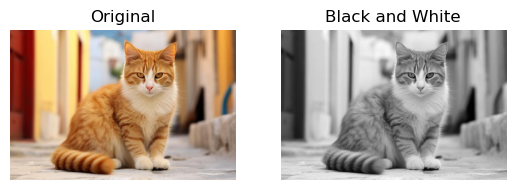

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

input_img = mpimg.imread('cat.png')
height = input_img.shape[0]
width = input_img.shape[1]

bw_mean = np.mean(input_img[..., :3], axis = 2)

plt.subplot(1,2,1); plt.title("Original"); plt.imshow(input_img); plt.axis('off')
plt.subplot(1,2,2); plt.title("Black and White"); plt.imshow(bw_mean, cmap='gray'); plt.axis('off')
plt.show()

#### Exercise: Implement 2d rotation of image using numpy

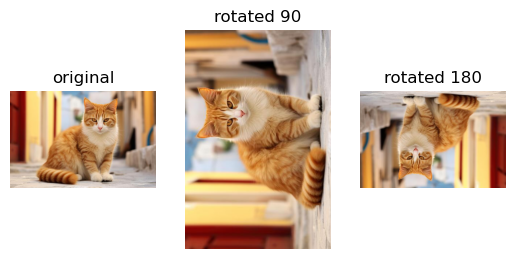

In [32]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('cat.png')
height = img.shape[0]
width = img.shape[1]

rotate90 = np.rot90(img)
rotate180 = np.rot90(rotate90)

plt.subplot(1,3,1); plt.title("original"); plt.imshow(img); plt.axis('off')
plt.subplot(1,3,2); plt.title("rotated 90"); plt.imshow(rotate90); plt.axis('off')
plt.subplot(1,3,3); plt.title("rotated 180"); plt.imshow(rotate180); plt.axis('off')
plt.show()

## Challenges

*Challenge:* Create a 4×4 magic-like matrix with `np.arange` and `reshape`.

In [33]:
n = 4
initial_array = np.arange(1, n*n + 1).reshape(n, n)
print("Initial Array:\n", initial_array)

rows = initial_array.shape[0]
cols = initial_array.shape[1]

for i in range(rows):
    for j in range(cols):
        if (i % 4 == j % 4) or (i % 4 + j % 4 == n-1):
            initial_array[i, j] = 17 - initial_array[i, j] # Invert values in the pattern

print("\n4x4 Magic Matrix:\n", initial_array)


Initial Array:
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]

4x4 Magic Matrix:
 [[16  2  3 13]
 [ 5 11 10  8]
 [ 9  7  6 12]
 [ 4 14 15  1]]


*Challenge*: Shuffle indices and split data into 80/20 train/test split

In [34]:
np.random.seed(36)
data_size = 10
indices = np.random.permutation(data_size)

split_point = int(0.8 * data_size)
train_indices = indices[:split_point]
test_indices = indices[split_point:]

print(f"Data size: {data_size}")
print(f"Train size: {len(train_indices)}, Test size: {len(test_indices)}")

print(f"Train indices: {train_indices}")
print(f"Test indices: {test_indices}")


Data size: 10
Train size: 8, Test size: 2
Train indices: [3 9 7 4 8 1 0 6]
Test indices: [2 5]


*Challenge*: Create float64 array, convert to float32, observe nbytes change

In [35]:
arr_f64 = np.array([1.1, 2.2, 3.3, 4.4, 5.5], dtype=np.float64)
arr_f32 = arr_f64.astype(np.float32)
print(f"float64 array: {arr_f64}")
print(f"float64 nbytes: {arr_f64.nbytes} bytes")
print(f"float32 array: {arr_f32}")
print(f"float32 nbytes: {arr_f32.nbytes} bytes")
print(f"Memory saved: {arr_f64.nbytes - arr_f32.nbytes} bytes")

float64 array: [1.1 2.2 3.3 4.4 5.5]
float64 nbytes: 40 bytes
float32 array: [1.1 2.2 3.3 4.4 5.5]
float32 nbytes: 20 bytes
Memory saved: 20 bytes


*Challenge*: Extract values greater than 50 using boolean indexing

In [36]:
arr = np.array([10, 25, 55, 75, 30, 85, 45, 90, 15, 65])
mask = arr > 50
output = arr[mask]
print(f"Original array: {arr}")
print(f"Boolean mask: {mask}")
print(f"VAlues > 50: {output}")

Original array: [10 25 55 75 30 85 45 90 15 65]
Boolean mask: [False False  True  True False  True False  True False  True]
VAlues > 50: [55 75 85 90 65]


*Challenge*: Add 1×3 array to every row of 5×3 matrix and verify the result shape


In [37]:
matrix_5x3 = np.random.randint(1, 10, size=(5, 3))
print(f"Original 5×3 matrix:\n{matrix_5x3}")
vector_1x3 = np.array([100, 200, 300])

result = matrix_5x3 + vector_1x3

print(f"1×3 vector to add: {vector_1x3}")
print(f"\nResult shape: {result.shape}")
print(f"Result matrix:\n{result}")

Original 5×3 matrix:
[[6 8 7]
 [5 1 7]
 [7 7 2]
 [7 5 5]
 [4 4 6]]
1×3 vector to add: [100 200 300]

Result shape: (5, 3)
Result matrix:
[[106 208 307]
 [105 201 307]
 [107 207 302]
 [107 205 305]
 [104 204 306]]


*Challenge*: Compute column-wise mean and subtract from matrix (centering)

In [38]:
X = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9],
              [10, 11, 12]], dtype=float)

col_means = X.mean(axis=0)
X_centered = X - col_means
print(f"Original matrix:\n{X}")
print(f"Column means: {col_means}")
print(f"Centered matrix:\n{X_centered}")
print(f"New column means (should be ~0): {X_centered.mean(axis=0)}")

Original matrix:
[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]
Column means: [5.5 6.5 7.5]
Centered matrix:
[[-4.5 -4.5 -4.5]
 [-1.5 -1.5 -1.5]
 [ 1.5  1.5  1.5]
 [ 4.5  4.5  4.5]]
New column means (should be ~0): [0. 0. 0.]


*Challenge*: Turn 36-length array into (3,3,4) and back

In [39]:
arr = np.arange(36)
reshaped_3d = arr.reshape(3, 3, 4)
back_to_flat = reshaped_3d.ravel()

print(f"Original flat array shape: {arr.shape}")
print(f"Reshaped to 3D shape: {reshaped_3d.shape}")
print(f"Back to flat shape: {back_to_flat.shape}")
print(f"Arrays are identical: {np.array_equal(arr, back_to_flat)}")

Original flat array shape: (36,)
Reshaped to 3D shape: (3, 3, 4)
Back to flat shape: (36,)
Arrays are identical: True


*Challenge*: Replace negative values with column mean using np.where


In [40]:
X = np.array([[-1, 2, -3],
            [4, -5, 6],
            [-7, 8, -9],
            [10, -11, 12]], dtype = float)
col_means = X.mean(axis = 0)

#replace negatives in each column with that column's mean
result = np.where(X < 0, col_means, X)
print(f"Original data:\n{X}")
print(f"Column means: {col_means}")
print(f"After replacing negatives:\n{result}")


Original data:
[[ -1.   2.  -3.]
 [  4.  -5.   6.]
 [ -7.   8.  -9.]
 [ 10. -11.  12.]]
Column means: [ 1.5 -1.5  1.5]
After replacing negatives:
[[ 1.5  2.   1.5]
 [ 4.  -1.5  6. ]
 [ 1.5  8.   1.5]
 [10.  -1.5 12. ]]
